In [1]:
#Please execute this cell
import jupman;

# Exam -  Mon 12, Jul 2021

**Scientific Programming - Data Science Master @ University of Trento**

## [Download exercises and solutions](../../../_static/generated/sciprog-ds-2021-07-12-exam.zip)

## Part A - DOOM

Open Jupyter and start editing this notebook `exam-2021-07-12.ipynb`

<!-- Originally focused on weapon and defense contracts, new ventures have expanded into biological research, space exploration and other scientific endeavors. With unlimited funds and the ability to engage in research outside of moral and legal obligations, the UAC controls the most advanced technology ever conceived.
-->

The Union Aerospace Corporation (UAC) is the largest inter-planetary corporate entity in existence<!--, operating facilities on Mars and its two moons, Phobos and Deimos-->. While drilling Mars soil, UAC discovered that what human legends call Hell, is actually a dimension reachable from a portal buried in Mars ground. UAC promptly sends space marines into the portal to extract demonic creatures, which now intends to use as military weapons. You are asked to develop a software to map and simulate the entities inside the Mars base. The offer looks questionable, but they pay well, so you accept.

**Historical note**: [DOOM](https://www.britannica.com/topic/Doom) is a glorious videogame by Id Software which first introduced somewhat credible 3d graphics in the early 90s, plus lots of gore. Over time, a number of fans made extensions for it, and even serious projects were born like [VizDoom](http://vizdoom.cs.put.edu.pl/) which allows developing AI bots that play DOOM using visual information. 

## A1 parse_map

Map data is provided in [doom-map.udmf](doom-map.udmf), in the UDMF text format ([complete specification](https://github.com/coelckers/gzdoom/blob/master/specs/udmf.txt) is long, but we will only use a small subset of it)

We are interested in 3 categories of objects: _vertex_, _linedef_, and _thing_. Each of these objects has a numeric integer `id`, progressively numbered according to its position in the file starting from zero.

- a _vertex_ holds coordinates float `x` ad `y`.
- a _linedef_ describes a map segment and holds references to the ids of two verteces `v1` and `v2`
- a _thing_ can be an entity in the map, like a monster or a space marine. A thing has float `x` and `y` coordinates, and an attribute called `type` (as int)
- ignore all other categories (like sidedef and sector) and attributes (sidefront, etc)
- whatever follows a `//` is a comment

Parse it **one line at a time** [like this](https://en.softpython.org/formats/formats-sol.html#1.-line-files) and output a dictionary as in [expected_map.py](expected_map.py) file.

* **DO NOT** assume number of blank lines is constant
* **DO NOT** assume number of parameters is constant
* **DO NOT** perform mega `.replace` on the whole file (i.e. to make it look like a JSON)

In [2]:

def parse_map(filepath):
    
    
    print("Parsing map", filepath)
    
    thing_counter = -1
    linedef_counter = -1
    vertex_counter = -1
    parsing = "" # "", "thing", "vertex", "linedef"
    things = []
    linedefs = []
    verteces = []
    
    with open(filepath, encoding='utf-8') as f:
        
        for line in f:            
            pline = line.strip()
            if pline.startswith('//'):
                continue
                      
            if pline.startswith("namespace="):
                continue
            
            if not pline:
                continue
                
            if pline == '{':
                continue
            
            if pline.startswith('thing'):
                thing_counter += 1
                parsing = "thing"
                thing = {}                
            elif pline.startswith('vertex'):
                vertex_counter += 1
                parsing = "vertex"
                vertex = {}                
            elif pline.startswith('linedef'):
                linedef_counter += 1
                parsing = "linedef"
                linedef = {}                
            elif pline == '}':
                if parsing == "thing":
                    things.append(thing)
                elif parsing == "linedef":
                    linedefs.append(linedef)
                elif parsing == "vertex":
                    verteces.append(vertex)
                parsing=""                
                
            if parsing == "thing":
                thing["id"] = thing_counter
                i = pline.find('=')
                attr = pline[:i]
                value = pline[i+1:].rstrip(';')
                if attr in ['x','y'] :
                    thing[attr] = float(value)
                elif attr in ['type']:
                    thing[attr] = int(value)                      
            elif parsing == "linedef":
                linedef["id"] = linedef_counter
                i = pline.find('=')
                attr = pline[:i]
                value = pline[i+1:].rstrip(';')
                if attr in ['v1','v2'] :
                    linedef[attr] = int(value)                
            elif parsing == "vertex":
                vertex["id"] = vertex_counter
                i = pline.find('=')
                attr = pline[:i]
                value = pline[i+1:].rstrip(';')
                if attr in ['x','y'] :
                    vertex[attr] = float(value)                                    
                                
        return {'thing': things,
                'linedef' : linedefs,
                'vertex' : verteces,
                'filepath': filepath}
                    

doom_map = parse_map('doom-map.udmf')
doom_map


Parsing map doom-map.udmf
{'filepath': 'doom-map.udmf',
 'linedef': [{'id': 0, 'v1': 4, 'v2': 1},
             {'id': 1, 'v1': 1, 'v2': 2},
             {'id': 2, 'v1': 2, 'v2': 3},
             {'id': 3, 'v1': 3, 'v2': 0},
             {'id': 4, 'v1': 0, 'v2': 4},
             {'id': 5, 'v1': 5, 'v2': 6},
             {'id': 6, 'v1': 6, 'v2': 7},
             {'id': 7, 'v1': 7, 'v2': 8},
             {'id': 8, 'v1': 8, 'v2': 5}],
 'thing': [{'id': 0, 'type': 1, 'x': -352.0, 'y': 0.0},
           {'id': 1, 'type': 71, 'x': -160.0, 'y': 128.0},
           {'id': 2, 'type': 67, 'x': -128.0, 'y': -64.0},
           {'id': 3, 'type': 71, 'x': 70.0, 'y': 200.0}],
 'vertex': [{'id': 0, 'x': -480.0, 'y': 192.0},
            {'id': 1, 'x': 160.0, 'y': 192.0},
            {'id': 2, 'x': -64.0, 'y': -160.0},
            {'id': 3, 'x': -384.0, 'y': -160.0},
            {'id': 4, 'x': -160.0, 'y': 416.0},
            {'id': 5, 'x': -224.0, 'y': 64.0},
            {'id': 6, 'x': -256.0, 'y': 256.0}

In [2]:

def parse_map(filepath):
    raise Exception('TODO IMPLEMENT ME !')               

doom_map = parse_map('doom-map.udmf')
doom_map


Parsing map doom-map.udmf
{'filepath': 'doom-map.udmf',
 'linedef': [{'id': 0, 'v1': 4, 'v2': 1},
             {'id': 1, 'v1': 1, 'v2': 2},
             {'id': 2, 'v1': 2, 'v2': 3},
             {'id': 3, 'v1': 3, 'v2': 0},
             {'id': 4, 'v1': 0, 'v2': 4},
             {'id': 5, 'v1': 5, 'v2': 6},
             {'id': 6, 'v1': 6, 'v2': 7},
             {'id': 7, 'v1': 7, 'v2': 8},
             {'id': 8, 'v1': 8, 'v2': 5}],
 'thing': [{'id': 0, 'type': 1, 'x': -352.0, 'y': 0.0},
           {'id': 1, 'type': 71, 'x': -160.0, 'y': 128.0},
           {'id': 2, 'type': 67, 'x': -128.0, 'y': -64.0},
           {'id': 3, 'type': 71, 'x': 70.0, 'y': 200.0}],
 'vertex': [{'id': 0, 'x': -480.0, 'y': 192.0},
            {'id': 1, 'x': 160.0, 'y': 192.0},
            {'id': 2, 'x': -64.0, 'y': -160.0},
            {'id': 3, 'x': -384.0, 'y': -160.0},
            {'id': 4, 'x': -160.0, 'y': 416.0},
            {'id': 5, 'x': -224.0, 'y': 64.0},
            {'id': 6, 'x': -256.0, 'y': 256.0}

In [3]:
# TESTING
from pprint import pformat; from expected_map import expected_map
for category in expected_map.keys():
    if category not in doom_map:
        print('\nERROR: MISSING category', category); break
    if category != 'filepath' and len(expected_map[category]) != len(doom_map[category]):
        print('\nERROR: DIFFERENT lengths for category', category); break
    for some_id in range(len(expected_map[category])):            
        if category != 'filepath' and expected_map[category][some_id] != doom_map[category][some_id]:
            print('\nERROR at category', category, 'id:',some_id)
            print('  ACTUAL:\n', pformat(doom_map[category][some_id]))
            print('  EXPECTED:\n', pformat(expected_map[category][some_id]))
            break

## A2 simulate

UAC is particularly interested in the tactical value of Pain Elementals, which can generate an apparent infinite amount of Lost Souls. UAC has estimated some parameters of these creatures, and wants you to devise a simulation of their behaviour.

**PRINT OUTPUT** as in the example

**MODIFY** provided doom map like so (for full modified map see `expected_sim.py`):

- The simulation is done in discrete steps of one second each, starting at `t=0`
- Every `spawn_time` seconds, each Pain Elemental generates a new Lost Soul, which must be added to things
- Each second a Lost Soul moves of up to +/- `m` integer units along both x axis and/or y axis. The x and y deltas are uniformly distributed independent random variables (hint: to calculate them  use `random.randint(a,b)`)
- For simplicity we assume Lost Souls can pass through walls, but we still impose that they **cannot leave the smallest rectangle enclosing the map**.
- At each step, MODIFY every Lost Soul thing by updating its x and y, and keep track of location past values (x,y) as a list in a new parameter `trace` you will associate to the thing. **NOTE**: `trace` holds **only** past values, never the current one.
- Assume all other entities stay still

In [4]:
import random

LOST_SOUL_TYPE = 3006
PAIN_ELEMENTAL_TYPE = 71

def simulate(dmap, duration, m, spawn_time):
    #VERY IMPORTANT: DO *NOT* REMOVE THIS LINE: IT INITIALIZES THE PSEUDO RANDOM
    # NUMBER GENERATOR SO DIFFERENT RUNS ALWAYS GIVE THE SAME 'RANDOM' SEQUENCE
    random.seed(1)        
    
    
   
    print("Simulating...")
    
    step = 1        
    things = dmap["thing"]
    
    import math
    minx, miny, maxx, maxy  = math.inf, math.inf, -math.inf, -math.inf
    
    
    for vertex in dmap["vertex"]:
        minx = min(minx, vertex["x"])
        miny = min(miny, vertex["y"])
        maxx = max(maxx, vertex["x"])
        maxy = max(maxy, vertex["y"])        
        
    print('Map boundaries:', "  minx", minx, "  miny", miny, "  maxx", maxx, "  maxy", maxy)    
        
    pain_els = []
    for thing in things:
        if thing["type"] == PAIN_ELEMENTAL_TYPE:
            pain_els.append(thing)
        
        thing["trace"] = []
    
    for t in range(0,duration + 1):
                
        for thing in things:
            if thing["type"] == LOST_SOUL_TYPE:
                thing["trace"].append((thing["x"], thing["y"]))
                            
        for thing in things:
            if thing["type"] == LOST_SOUL_TYPE:                
                ntx = thing["x"] + random.randint(-m,m)
                nty = thing["y"] + random.randint(-m,m)
                
                if ntx < minx:
                    ntx = minx
                if ntx > maxx:
                    ntx = maxx
                if nty < miny:
                    nty = miny
                if nty > maxy:
                    nty = maxy
                    
                thing["x"] = ntx
                thing["y"] = nty
                

        if t % spawn_time == 0:     
            if t > 0: # no span at beginning...
                for pain_el in pain_els:
                    nid = len(things)
                    print("t =",t, "Pain Elemental id =", pain_el["id"], ": Spawning Lost Soul id =", nid)
                    things.append({"id": nid,
                                   "x": pain_el["x"], 
                                   "y": pain_el["y"],
                                   "type": LOST_SOUL_TYPE,
                                   "trace" : []})                
                        
    print("Elapsed time:", t, "seconds")
    
    
doom_map = parse_map('doom-map.udmf')
simulate(doom_map, 31,65,8)  # return *nothing* !

print("\nExample of last generated Lost Soul:\n",doom_map["thing"][-1])

Parsing map doom-map.udmf
Simulating...
Map boundaries:   minx -480.0   miny -160.0   maxx 160.0   maxy 416.0
t = 8 Pain Elemental id = 1 : Spawning Lost Soul id = 4
t = 8 Pain Elemental id = 3 : Spawning Lost Soul id = 5
t = 16 Pain Elemental id = 1 : Spawning Lost Soul id = 6
t = 16 Pain Elemental id = 3 : Spawning Lost Soul id = 7
t = 24 Pain Elemental id = 1 : Spawning Lost Soul id = 8
t = 24 Pain Elemental id = 3 : Spawning Lost Soul id = 9
Elapsed time: 31 seconds

Example of last generated Lost Soul:
 {'id': 9, 'x': 19.0, 'y': 157.0, 'type': 3006, 'trace': [(70.0, 200.0), (50.0, 181.0), (53.0, 144.0), (104.0, 161.0), (66.0, 160.0), (115.0, 224.0), (82.0, 213.0)]}


In [4]:
import random

LOST_SOUL_TYPE = 3006
PAIN_ELEMENTAL_TYPE = 71

def simulate(dmap, duration, m, spawn_time):
    #VERY IMPORTANT: DO *NOT* REMOVE THIS LINE: IT INITIALIZES THE PSEUDO RANDOM
    # NUMBER GENERATOR SO DIFFERENT RUNS ALWAYS GIVE THE SAME 'RANDOM' SEQUENCE
    random.seed(1)        
    
    raise Exception('TODO IMPLEMENT ME !')
    
doom_map = parse_map('doom-map.udmf')
simulate(doom_map, 31,65,8)  # return *nothing* !

print("\nExample of last generated Lost Soul:\n",doom_map["thing"][-1])

Parsing map doom-map.udmf
Simulating...
Map boundaries:   minx -480.0   miny -160.0   maxx 160.0   maxy 416.0
t = 8 Pain Elemental id = 1 : Spawning Lost Soul id = 4
t = 8 Pain Elemental id = 3 : Spawning Lost Soul id = 5
t = 16 Pain Elemental id = 1 : Spawning Lost Soul id = 6
t = 16 Pain Elemental id = 3 : Spawning Lost Soul id = 7
t = 24 Pain Elemental id = 1 : Spawning Lost Soul id = 8
t = 24 Pain Elemental id = 3 : Spawning Lost Soul id = 9
Elapsed time: 31 seconds

Example of last generated Lost Soul:
 {'id': 9, 'x': 19.0, 'y': 157.0, 'type': 3006, 'trace': [(70.0, 200.0), (50.0, 181.0), (53.0, 144.0), (104.0, 161.0), (66.0, 160.0), (115.0, 224.0), (82.0, 213.0)]}


## A3 plot_map

Draw the map:

- use filename as title
- there's no need to plot verteces dots
- only plot entity names (inserting newlines) - to get them import provided [entities_db.py](entities_db.py) which maps an entity type to its data. 
- make it fancy following [this example](https://en.softpython.org/visualization/visualization-sol.html#Fancy-plots): plot dark background, and Lost Soul traces with dark color for old trace and bright for recent using `alpha` parameter

**EXTRA** (was not required during exam): plot images taking file names from `entities_db.py` and files from `img/` folder 

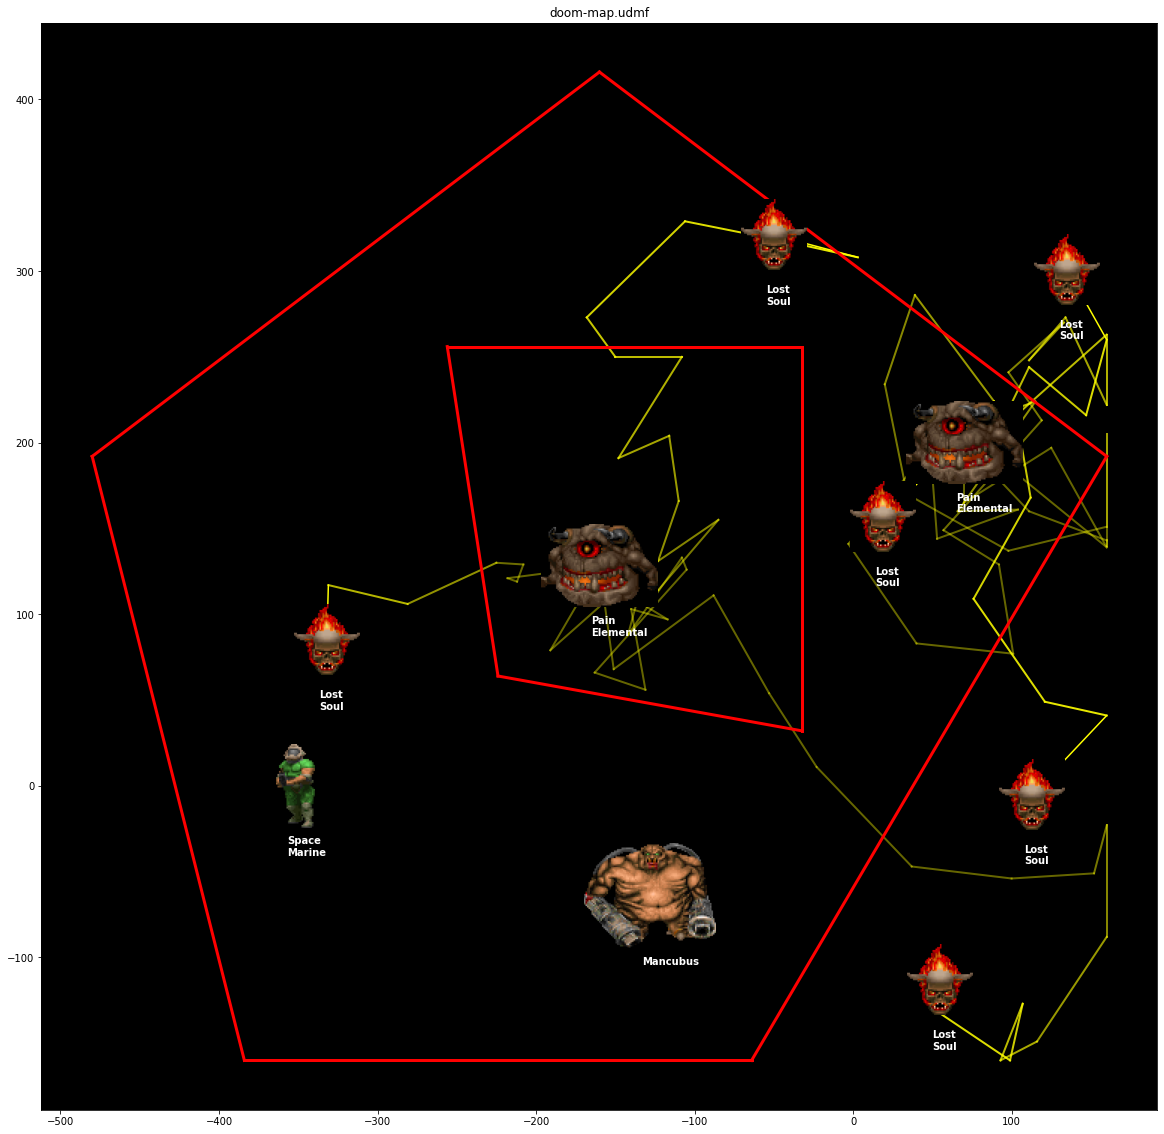

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from entities_db import entities_db

def plot_map(entities, doom_map):
    
       
        
    plt.rcParams['axes.facecolor'] = 'black'
    fig = plt.figure(figsize=(20,20))    
    plt.title(doom_map["filepath"])        
    
    for thing in doom_map["thing"]:
        if "trace" in thing:
            for i in range(len(thing["trace"])-1):
                plt.plot([thing["trace"][i][0], thing["trace"][i+1][0]],
                         [thing["trace"][i][1], thing["trace"][i+1][1]], 
                         color="yellow",
                         linewidth=2,
                         alpha=max(0.4,i/len(thing["trace"])))
            if len(thing["trace"]) > 0:
                ptr = thing["trace"][-1]
                plt.plot([ptr[0], thing["x"]] , [ptr[1], thing["y"]], color="yellow")
            
    for linedef in doom_map["linedef"]:     
        #print(linedef)
        v1 = doom_map["vertex"][linedef["v1"]]        
        v2 = doom_map["vertex"][linedef["v2"]]                                 
        plt.plot([v1["x"], v2["x"]], [v1["y"], v2["y"]], linewidth=3, color="red")
        
    # images    
    from matplotlib.offsetbox import OffsetImage, AnnotationBbox
    ax=fig.gca() 
    for thing in doom_map["thing"]:                        
        thing_img = plt.imread('img/' + entities[thing["type"]]["class"] + '.gif')
        abb = AnnotationBbox(
            OffsetImage(thing_img, zoom=1.5),
            (thing["x"], thing["y"]),
            frameon=False
        )                 
        ax.add_artist(abb)

    #text
    #super rough image size estimation
    dim = 0.07 * abs(max([v["y"] for v in doom_map["vertex"]]) - min([v["y"] for v in doom_map["vertex"]]))    

    for thing in doom_map["thing"]:
        plt.text(thing["x"] - 5, 
                 thing["y"] - dim, 
                 entities_db[thing["type"]]["name"].replace(' ', '\n'), 
                 fontweight='bold',
                 color="white")
                                            
    
    plt.show()
    
    
plot_map(entities_db, doom_map)

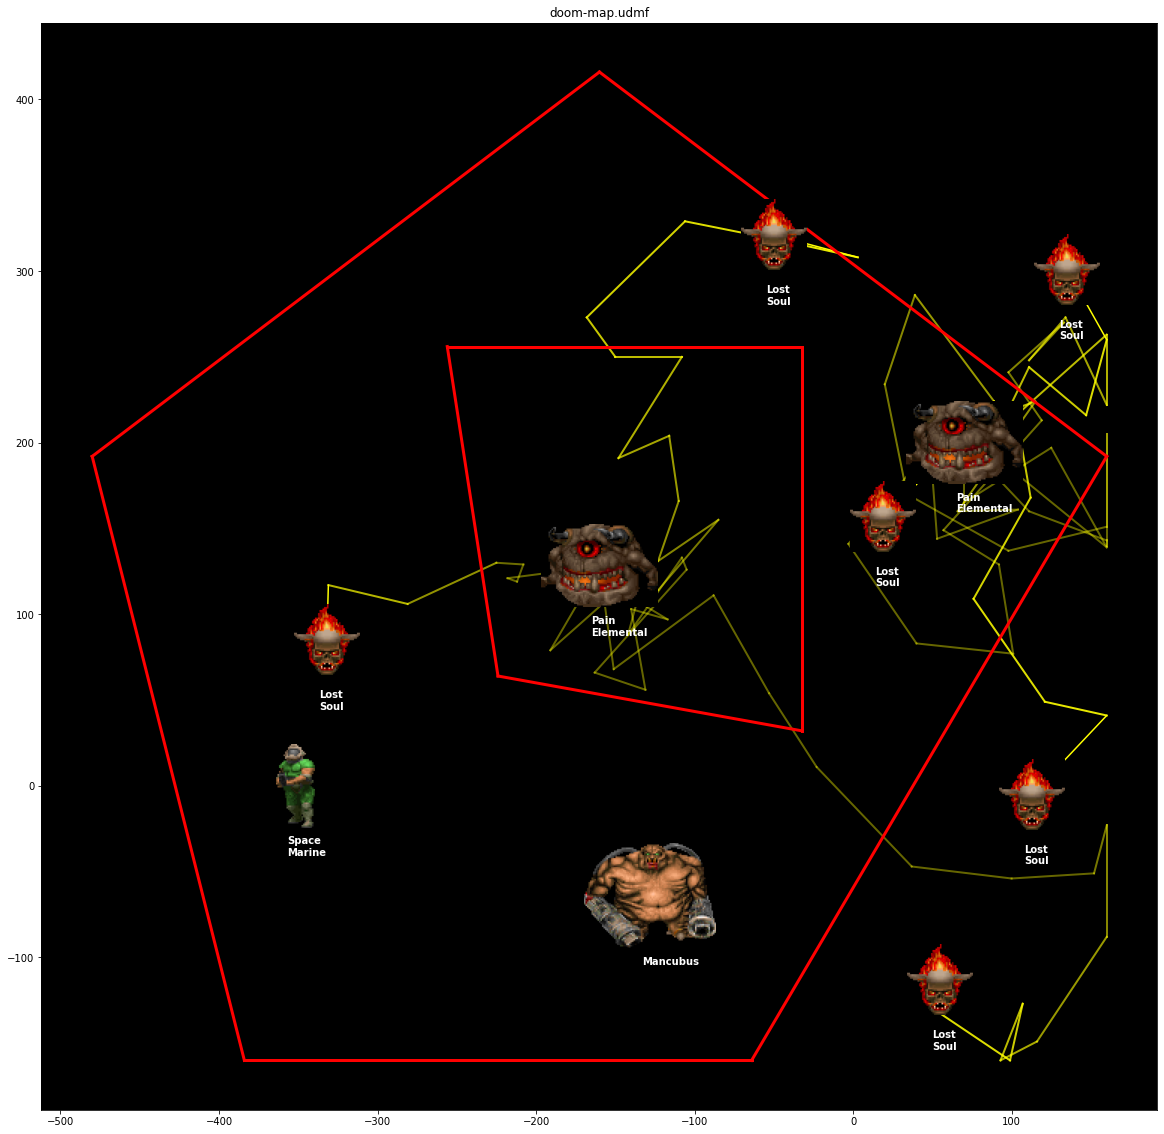

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from entities_db import entities_db

def plot_map(entities, doom_map):
    raise Exception('TODO IMPLEMENT ME !')
    
plot_map(entities_db, doom_map)

## Part B

* Open Visual Studio Code and start editing the folder on your desktop
* For running tests: open _Accessories -> Terminal_ 

## B1 Theory

**Write the solution in separate `theory.txt` file**

### B1.1 Complexity

Given a list `L` of $n$ elements, please compute the asymptotic computational complexity of the `my_fun` function, explaining your reasoning. **NOTE**: please notice that it calls the function `my_fun2`

```python
def my_fun2(L):
    n = len(L)
    tmp = []
    for i in range(n):
        for j in range(n):
            tmp.append(L[i]/(1+L[j]))
    return tmp         

def my_fun(L):
    n = len(L)
    if n <= 1:
        return 1
    else:
        L1 = L[0:n//2]
        L2 = L[n//2:]
        a = my_fun(L1) + max(my_fun2(L1))
        b = my_fun(L2) + max(my_fun2(L2))
        return a - b
```

### B1.2 Hash

What is a hash function? Which python data structures use hash functions?

## B2 PyraStack

You are given a PyraStack class which holds a list of lists called `_rows`. Internal lists only contain `-` character. Implement this method:

def drop(self, w):
    """ Drops a block of size w on the pyrastack, trying to place it on
        the top leftmost position without having missing blocks below.
        If top row is not feasible, scans for the first available leftmost 
        place which can fully accomodate the block.            
        
        - if w is negative, raise ValueError
        - if w is zero, no change is made
        
        - MUST run in O(h + w) where h is the stack height
    """


<!-- **QUESTION**: would it be possible to obtain that complexity if _rows were a list of strings? -->
**Example** (rows are **printed bottom-up**):

In [7]:
from pyrastack_sol import *

s = PyraStack()
s.drop(10)
s.drop(7)
s.drop(5)
s.drop(2)
s.drop(3)
s.drop(6)
s.drop(6)
s.drop(1)
s.drop(7)
from pprint import pprint
print("_rows are:");pprint(s._rows, width=150)

DEBUG:  Dropped 10, pyrastack is:
        ----------
DEBUG:  Dropped 7, pyrastack is:
        -------
        ----------
DEBUG:  Dropped 5, pyrastack is:
        -----
        -------
        ----------
DEBUG:  Dropped 2, pyrastack is:
        --
        -----
        -------
        ----------
DEBUG:  Dropped 3, pyrastack is:
        -----
        -----
        -------
        ----------
DEBUG:  Dropped 6, pyrastack is:
        -----
        -----
        -------
        ----------------
DEBUG:  Dropped 6, pyrastack is:
        -----
        -----
        -------------
        ----------------
DEBUG:  Dropped 1, pyrastack is:
        -
        -----
        -----
        -------------
        ----------------
DEBUG:  Dropped 7, pyrastack is:
        -
        -----
        ------------
        -------------
        ----------------
_rows are:
[['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-'],
 ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-',

## B3 union_rec

Open `bin_tree.py` and implement following method:

def union_rec(self, other):
    """ Supposing this is a binary tree of integers, takes another binary tree
        and MODIFIES self so it becomes the union of the two.            
        
        Imagine to overlay the two trees, and:
        - whenever two nodes occupy the same position, the self one is updated 
            by summing the corresponding node data from other
        - if other has more nodes than self, create corresponding NEW nodes in self
        
        - a recursive solution is acceptable
        - DO *NOT* share nodes between the trees
        - DO *NOT* throw away existing nodes in self
        - MUST run in O(max(n,m)) where n,m are the number of nodes in self 
          and other
    """



**Testing**: `python3 -m unittest bin_tree_test.UnionRecTest`

**Example:**

In [9]:
from bin_tree_sol import *
from bin_tree_test import bt

In [10]:
ta = bt(3,
        bt(5,
                bt(7,
                    None,
                    bt(1,
                        bt(17)))),
        bt(6))

tb = bt(8,
        bt(10,
                bt(9,
                    bt(13))),
        bt(12,
                bt(11,
                        None,
                        bt(2)),
                bt(4))) 
ta.union_rec(tb)  

In [11]:
print(ta)

11
├15
│├16
││├13
││└1
││ ├17
││ └
│└
└18
 ├11
 │├
 │└2
 └4


In [12]:
#ignore this
import jupman
import pyrastack_test
import pyrastack_sol
pyrastack_sol.DEBUG = False
jupman.run(pyrastack_test)
#import linked_list_test
import bin_tree_test
jupman.run(bin_tree_test)
#jupman.run(linked_list_test)

.........
----------------------------------------------------------------------
Ran 9 tests in 0.008s

OK
..................
----------------------------------------------------------------------
Ran 18 tests in 0.024s

OK
